In [1]:
import transformers

In [2]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch



In [3]:
model_name = "google-bert/bert-large-uncased-whole-word-masking-finetuned-squad"

In [4]:
model = BertForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at google-bert/bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
tokenizer = BertTokenizer.from_pretrained(model_name)

In [6]:
question = "How long is the Great Wall?"
answer_doc = "The Great Wall of China is a series of fortifications that were built across the historical northern borders of China. The most well-known sections were constructed during the Ming Dynasty (1368–1644). The wall was built to protect Chinese states against invasions by nomadic groups from the north. Stretching over 13,000 miles, the Great Wall is considered one of the greatest architectural achievements in history. It is made from a variety of materials including stone, brick, tamped earth, and wood. Today, it is a popular tourist destination and a UNESCO World Heritage Site."


In [7]:
encoding = tokenizer.encode_plus(text=question, text_pair=answer_doc)

In [8]:
encoding

{'input_ids': [101, 2129, 2146, 2003, 1996, 2307, 2813, 1029, 102, 1996, 2307, 2813, 1997, 2859, 2003, 1037, 2186, 1997, 14507, 2008, 2020, 2328, 2408, 1996, 3439, 2642, 6645, 1997, 2859, 1012, 1996, 2087, 2092, 1011, 2124, 5433, 2020, 3833, 2076, 1996, 11861, 5321, 1006, 15407, 2620, 1516, 23477, 1007, 1012, 1996, 2813, 2001, 2328, 2000, 4047, 2822, 2163, 2114, 23536, 2011, 21702, 2967, 2013, 1996, 2167, 1012, 10917, 2058, 2410, 1010, 2199, 2661, 1010, 1996, 2307, 2813, 2003, 2641, 2028, 1997, 1996, 4602, 6549, 10106, 1999, 2381, 1012, 2009, 2003, 2081, 2013, 1037, 3528, 1997, 4475, 2164, 2962, 1010, 5318, 1010, 17214, 5669, 3011, 1010, 1998, 3536, 1012, 2651, 1010, 2009, 2003, 1037, 2759, 7538, 7688, 1998, 1037, 12239, 2088, 4348, 2609, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [9]:
inputs = encoding['input_ids']
sentense_embedding = encoding['token_type_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [10]:
tokenizer.decode(101)


'[CLS]'

In [11]:
tokenizer.decode(102)

'[SEP]'

In [12]:
output = model(input_ids = torch.tensor([inputs]), token_type_ids = torch.tensor(sentense_embedding))

In [13]:
output

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-6.5542, -5.6631, -7.6392, -7.5818, -7.5868, -7.9137, -9.0541, -9.5309,
         -6.5542,  0.7458,  0.7411, -4.2194, -7.3371, -3.9741, -6.1283, -4.7002,
         -4.7607, -7.1871, -4.8854, -7.8527, -7.4630, -5.3581, -4.9588, -6.2953,
         -5.3718, -4.7904, -5.8676, -7.5186, -3.4380, -6.5542, -4.2621, -5.0961,
         -6.2507, -4.5009, -6.5876, -4.4400, -7.1340, -5.5446, -6.8510, -6.2069,
         -4.7016, -6.1277, -5.7338, -3.7294, -6.8457, -7.0432, -4.5793, -6.3175,
         -6.0794, -1.6790, -3.6042, -6.9227, -5.0392, -5.9531, -5.6540, -5.0333,
         -6.7651, -7.1968, -5.4847, -7.9717, -6.6502, -7.2788, -7.8591, -7.5595,
         -5.2678, -0.8135,  4.5741,  6.2451,  7.3390, -1.1717, -1.8286, -1.3660,
         -4.4359,  2.1441,  0.2308, -4.0318, -6.2245, -5.0101, -5.0695, -7.5186,
         -7.1650, -5.7864, -5.8222, -6.2070, -7.8345, -5.6776, -6.5096, -2.6573,
         -6.9126, -5.9013, -7.4625, -7.3724, -6.6701, -8

In [14]:
start_token = torch.argmax(output.start_logits)

In [15]:
end_token = torch.argmax(output.end_logits)

In [16]:
print(start_token)
print(end_token)

tensor(68)
tensor(71)


In [17]:
answer = ' '.join(tokens[start_token:end_token+1])

In [18]:
answer

'13 , 000 miles'

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
start_score = output.start_logits.detach().numpy().flatten()
end_score = output.end_logits.detach().numpy().flatten()

In [21]:
token_label = []
for(i,token) in enumerate(tokens):
    token_label.append('{:} - {:>2}'.format(token,i))

C:\Users\hp\AppData\Local\Temp\ipykernel_10820\2882331893.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


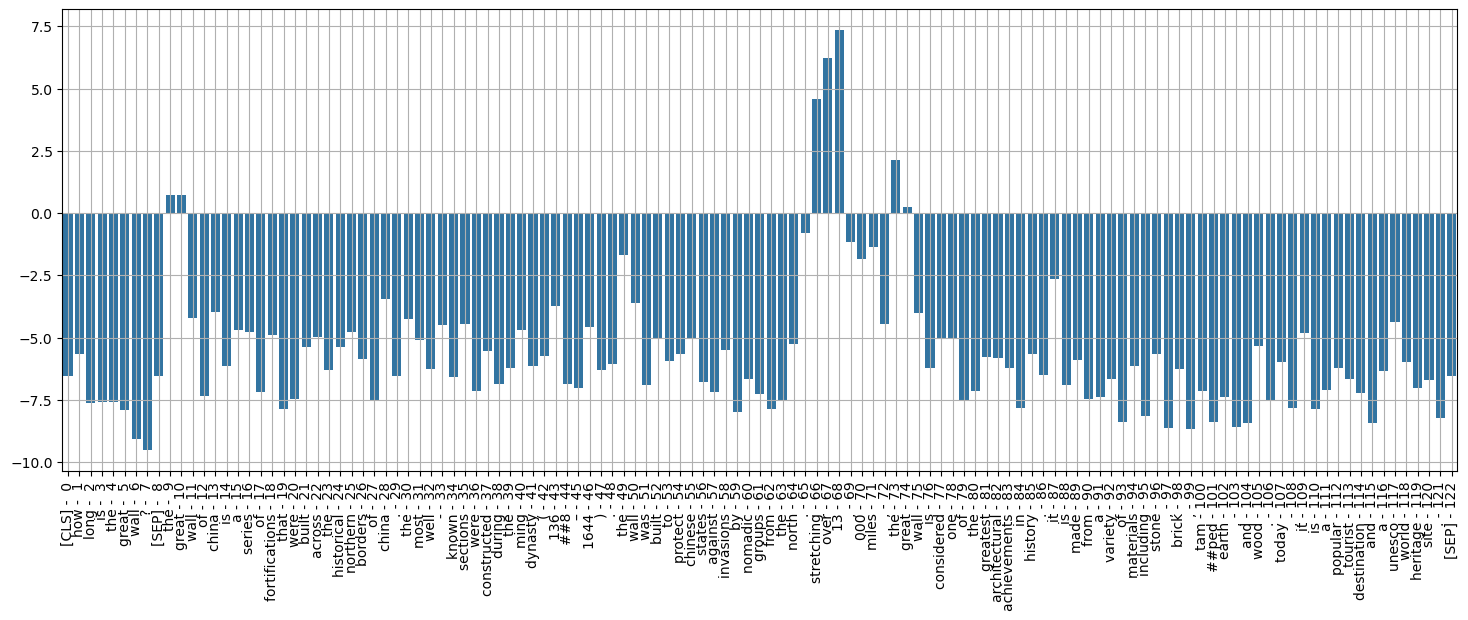

In [22]:
plt.figure(figsize=(18, 6))

ax = sns.barplot(x=token_label, y=start_score)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10820\228094844.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


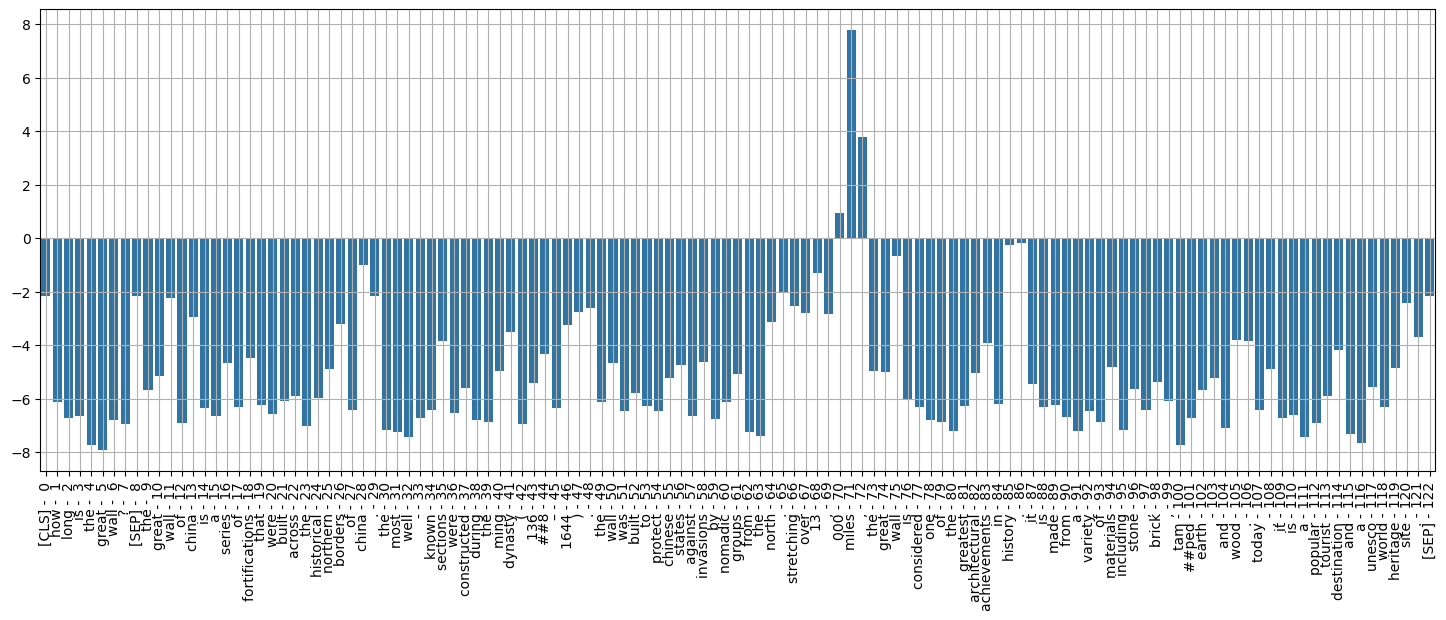

In [23]:
plt.figure(figsize=(18, 6))

ax = sns.barplot(x=token_label, y=end_score)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

plt.show()


CHATBOT FOR Q&A

In [24]:
company_profile = "TechNova Solutions Pvt. Ltd. is a Bengaluru-based IT services and consulting company founded in 2012. It specializes in delivering innovative digital transformation solutions to businesses worldwide. With a strong focus on cloud computing, artificial intelligence, machine learning, and automation, TechNova helps companies modernize their operations and improve efficiency. The company offers a wide range of services including software development for web and mobile applications, cloud infrastructure deployment using AWS, Azure, and Google Cloud, as well as data analytics, predictive modeling, and AI-driven business intelligence. Additionally, TechNova provides expert UI/UX design and IT consulting services tailored to specific business needs.Currently led by CEO Priya Ramesh, the company has over 500 employees and serves clients across multiple industries such as healthcare, finance, retail, and logistics. TechNova’s mission is to empower businesses with scalable, secure, and future-ready digital solutions, and its vision is to be a global leader in digital innovation. With offices in India, the United States, and Singapore, TechNova Solutions continues to expand its global footprint while maintaining a strong client focus and technical excellence."
print(company_profile)

TechNova Solutions Pvt. Ltd. is a Bengaluru-based IT services and consulting company founded in 2012. It specializes in delivering innovative digital transformation solutions to businesses worldwide. With a strong focus on cloud computing, artificial intelligence, machine learning, and automation, TechNova helps companies modernize their operations and improve efficiency. The company offers a wide range of services including software development for web and mobile applications, cloud infrastructure deployment using AWS, Azure, and Google Cloud, as well as data analytics, predictive modeling, and AI-driven business intelligence. Additionally, TechNova provides expert UI/UX design and IT consulting services tailored to specific business needs.Currently led by CEO Priya Ramesh, the company has over 500 employees and serves clients across multiple industries such as healthcare, finance, retail, and logistics. TechNova’s mission is to empower businesses with scalable, secure, and future-rea

In [25]:
def faq_bot(question):

    context = company_profile
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    sep_idx = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_idx+1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    output = model(torch.tensor([input_ids]), token_type_ids = torch.tensor([segment_ids]))
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
    if answer_end >= answer_start:
        answer = ' '.join(tokens[answer_start:answer_end+1])
    else:
        print("I don't know how to answer this question, can you ask another one?")
    corrected_answer = ''
    for word in answer.split():
        if word[0:2] == '##':
            corrected_answer += word[2:]
        else:
            corrected_answer += ' ' + word
    return corrected_answer

In [26]:
faq_bot("Who is the CEO of TechNova?")

' priya ramesh'

In [27]:
faq_bot("When was TechNova Solutions founded?")

' 2012'

In [28]:
faq_bot("What is the company's mission?")

' to empower businesses with scalable , secure , and future - ready digital solutions'